In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [2]:
bn=gum.fastBN("H->A->Y{chaud|tiede|froid}<-B->C;G<-F<-Y->D<-E;A->E;B->F",3)
bn

(gum::BayesNet<double>@0000023A285ABAD0) BN{nodes: 9, arcs: 10, domainSize: 19683, dim: 123}

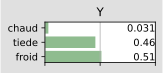

In [3]:
I=bn.completeInstantiation()
I.erase("Y")
gnb.showPosterior(bn,target="Y",evs=I.todict())

In [4]:
p=bn.cpt("Y").extract(I)
for i in bn.children("Y"):
  p*=bn.cpt(i).extract(I)

In [5]:
mb=gum.BayesNetFragment(bn)
mb.installNode("Y")
for i in bn.children("Y"):
  mb.installNode(i)
  for j in bn.parents(i):
    mb.installNode(j)
for i in bn.parents("Y"):
  mb.installNode(i)
gnb.sideBySide(mb.cpt("Y"),bn.cpt("Y"))
for i in bn.children("Y"):
  gnb.sideBySide(mb.cpt(i),bn.cpt(i))